# **1. first step(install,download,unzip....)**

In [1]:
# update gdown for download 
! pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


## 1.1 mount drive

In [2]:
from google.colab import drive
# mount google drive for save data
drive.mount('/content/drive')

Mounted at /content/drive


## 2. download data 

In [3]:
# download direct wav data and csv files
!gdown 1gUPpqPTlgfzIyDU4eG6t5HoTlK5inLO4

Downloading...
From: https://drive.google.com/uc?id=1gUPpqPTlgfzIyDU4eG6t5HoTlK5inLO4
To: /content/dsl_data.zip
100% 521M/521M [00:02<00:00, 228MB/s]


In [4]:
# unsiz data to dsl_data folder
!unzip /content/dsl_data.zip -d dsl_data

Streaming output truncated to the last 5000 lines.
  inflating: dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/bb584980-4501-11e9-a1ea-79ca03012c0e.wav  
  inflating: dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/1d466520-4500-11e9-a1ea-79ca03012c0e.wav  
  inflating: dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/51c7dcc0-4500-11e9-a1ea-79ca03012c0e.wav  
  inflating: dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/4efef8c0-4500-11e9-a1ea-79ca03012c0e.wav  
  inflating: dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/4bb10640-4500-11e9-a1ea-79ca03012c0e.wav  
  inflating: dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/45d42b80-4500-11e9-a1ea-79ca03012c0e.wav  
  inflating: dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/63247140-4500-11e9-a1ea-79ca03012c0e.wav  
  inflating: dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/bdb80b70-4501-11e9-a1ea-79ca03012c0e.wav  
  inflating: dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/17338640-4500-11e9-a1ea-79ca03012c0e.wav  
  inflating: dsl_data/audio/speakers/9MX3AgZzVgCw4W4j/e681b340-450a-11e9-953

# **2- Read Data**

## 2.1 read csv files

In [5]:
import pandas as pd
# read development and evaluation files
data_development=pd.read_csv('/content/dsl_data/development.csv')
data_evaluation=pd.read_csv('/content/dsl_data/evaluation.csv')

In [6]:
data_development

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
...,...,...,...,...,...,...,...,...,...,...
9849,9849,dsl_data/audio/speakers/vnljypgejkINbBAY/4fb3d...,vnljypgejkINbBAY,decrease,volume,native,English (United States),English (United States),male,22-40
9850,9850,dsl_data/audio/speakers/vnljypgejkINbBAY/59e6a...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40
9851,9851,dsl_data/audio/speakers/vnljypgejkINbBAY/5c81c...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40
9852,9852,dsl_data/audio/speakers/vnljypgejkINbBAY/5ef42...,vnljypgejkINbBAY,deactivate,lights,native,English (United States),English (United States),male,22-40


## 2.2 read wav files

◾ read evaluation csv files and get signal

In [7]:
import numpy as np
import librosa
import librosa.display
from tqdm import tqdm 

# read all wav files from data_evaluation
signals = []
for i in tqdm(range(len(data_evaluation))):
  # get signal value by librosa library
  signal, sr = librosa.load(data_evaluation.loc[i]["path"])
  signals.append(signal)
data_evaluation['signal'] = signals

100%|██████████| 1455/1455 [01:07<00:00, 21.40it/s]


In [8]:
sr

22050

In [9]:
signal

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [10]:
signal.shape

(48923,)

In [11]:
39514/22050

1.7920181405895692

◾ read development csv files and get signal

In [12]:
import numpy as np
import librosa
import librosa.display
from tqdm import tqdm 

# read all wav files from data_development
signals = []
for i in tqdm(range(len(data_development))):
  signal, sr = librosa.load(data_development.loc[i]["path"])
  signals.append(signal)
data_development['signal'] = signals


100%|██████████| 9854/9854 [06:37<00:00, 24.80it/s]


In [13]:
# check null value in data_development andd ata_evaluation
data_development = data_development[data_development['signal'].notnull()]
data_evaluation = data_evaluation[data_evaluation['signal'].notnull()]

# **3.preprocessing**

In [14]:
# get new lbl with action+ object
data_development['lbl']=data_development['action']+data_development['object']

In [15]:
# convert string columns to int
from sklearn import preprocessing
lst_convert=["gender", "speakerId",'ageRange',
             "Self-reported fluency level ",
             "First Language spoken",'action','object',
             'Current language used for work/school','lbl']
le_dict={}
print("_"*100)
for col_name in lst_convert:
  le=preprocessing.LabelEncoder()
  print('--'*20)
  print(col_name)
  data_development[col_name]=data_development[col_name].astype("string")
  most_frq=data_development[col_name].mode().values[0]
  data_development[col_name]=data_development[col_name].fillna(most_frq)
  # if( )
  le.fit(data_development[col_name])
  data_development[col_name]=le.transform(data_development[col_name])
  le_dict[col_name]=le
print("_"*100)

____________________________________________________________________________________________________
----------------------------------------
gender
----------------------------------------
speakerId
----------------------------------------
ageRange
----------------------------------------
Self-reported fluency level 
----------------------------------------
First Language spoken
----------------------------------------
action
----------------------------------------
object
----------------------------------------
Current language used for work/school
----------------------------------------
lbl
____________________________________________________________________________________________________


In [16]:
le_dict['lbl'].classes_

array(['activatemusic', 'change languagenone', 'deactivatelights',
       'decreaseheat', 'decreasevolume', 'increaseheat', 'increasevolume'],
      dtype=object)

In [17]:
import numpy as np
print('_'*100)
for item in le_dict['lbl'].classes_:
  class_encod=le_dict['lbl'].transform(np.array(item).ravel())[0]
  data_one=data_development[data_development['lbl']==class_encod]
  print('iteam name | {} | Encoder value | {} | count {}'.format(item+(' ' *abs(len(item)-20)),
                                                                 class_encod,data_one.shape[0]))
print('_'*100)

____________________________________________________________________________________________________
iteam name | activatemusic        | Encoder value | 0 | count 791
iteam name | change languagenone  | Encoder value | 1 | count 1113
iteam name | deactivatelights     | Encoder value | 2 | count 552
iteam name | decreaseheat         | Encoder value | 3 | count 1189
iteam name | decreasevolume       | Encoder value | 4 | count 2386
iteam name | increaseheat         | Encoder value | 5 | count 1209
iteam name | increasevolume       | Encoder value | 6 | count 2614
____________________________________________________________________________________________________


#**4. save and load data on google drive**

In [18]:
import pickle

# # save data_development on drive
# filename = '/content/drive/MyDrive/data_development.pkl'
# pickle.dump(data_development, open(filename, 'wb'))

# # save data_evaluation on drive
# filename = '/content/drive/MyDrive/data_evaluation.pkl'
# pickle.dump(data_evaluation, open(filename, 'wb'))

# # save data_all on drive
# filename = '/content/drive/MyDrive/data_all.pkl'
# pickle.dump(data_evaluation, open(filename, 'wb'))


In [19]:
# import pickle
# # read data_development on drive
# filename = '/content/drive/MyDrive/data_development.pkl'
# with open(filename, 'rb') as f:
#   data_development=pickle.load(f)

# # read data_evaluation on drive
# filename = '/content/drive/MyDrive/data_evaluation.pkl'
# with open(filename, 'rb') as f:
#   data_evaluation=pickle.load(f)


# **5. Visualization**

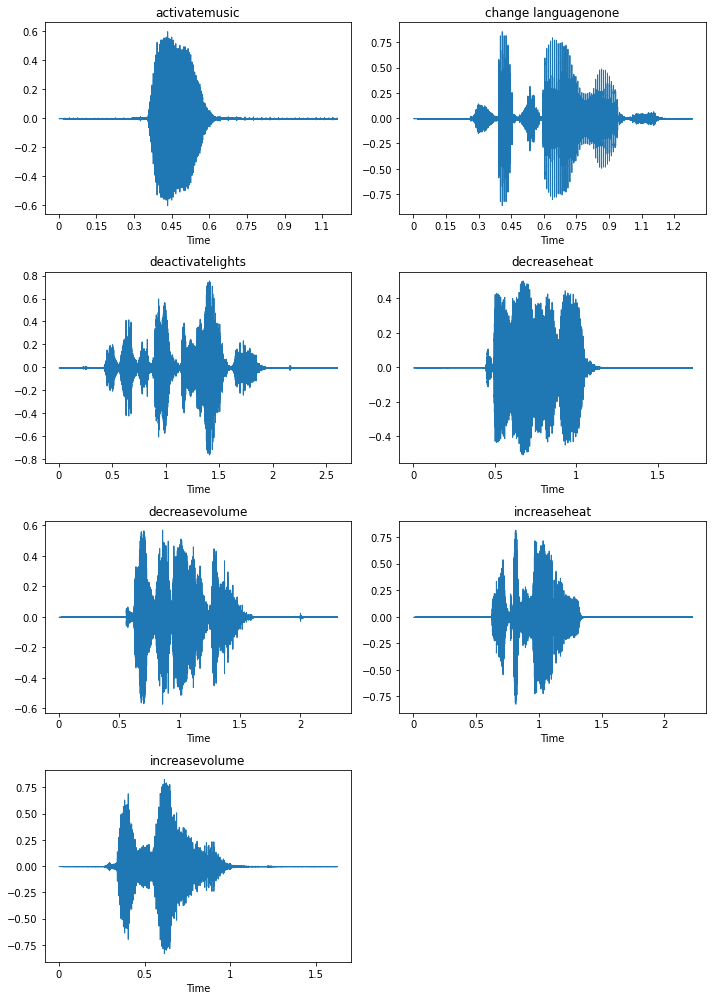

In [20]:
# plot ramdom one wav for each class
import matplotlib.pyplot as plt
import librosa
import librosa.display

fig, axs = plt.subplots(4,2)
fig.set_size_inches(10,14)
axs = axs.ravel()
class_idx=le_dict['lbl'].transform(le_dict['lbl'].classes_)

for i in range(len(class_idx)):
  signal = data_development[data_development['lbl'] == class_idx[i]]['signal'].sample(1).to_numpy()[0]
  img = librosa.display.waveshow(signal, x_axis='time', ax=axs[i])
  axs[i].set_title( le_dict['lbl'].classes_[i])

fig.delaxes(axs[-1])
fig.tight_layout()

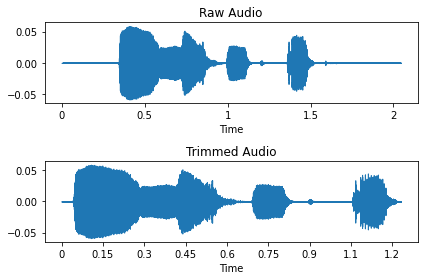

In [21]:
##-- TRIMMING SILENCE AUDIO
fig, axs = plt.subplots(2,1)
idx=7
librosa.display.waveshow(data_development.loc[idx]['signal'], ax=axs[0])
axs[0].set_title('Raw Audio')

data_development['signal'] = data_development['signal'].apply(lambda y: librosa.effects.trim(y, top_db=20)[0])


librosa.display.waveshow(data_development.loc[idx]['signal'], ax=axs[1])
axs[1].set_title('Trimmed Audio')
fig.tight_layout()


In [22]:
data_evaluation['signal'] = data_evaluation['signal'].apply(lambda y: librosa.effects.trim(y, top_db=20)[0])

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


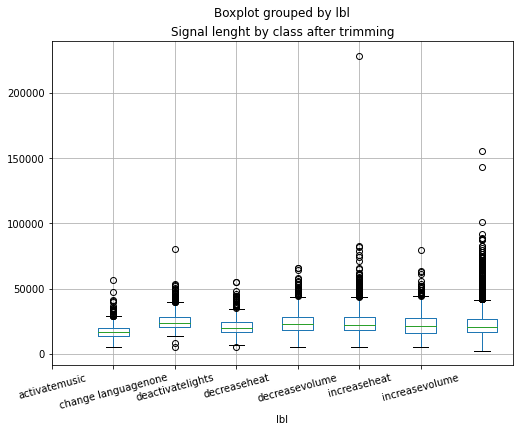

In [23]:
##-- EXPLORING LENGHT DISTRIBUTION AFTER TRIMMING
fig, axs = plt.subplots()
fig.set_size_inches(8,6)
data_development["signal_length"] = data_development["signal"].apply(lambda x: len(x))
data_development[data_development.signal_length > 0].boxplot(column="signal_length",by="lbl",ax=axs)

axs.set_title('')
data_development = data_development.drop('signal_length', axis=1)
plt.xticks(range(7),le_dict['lbl'].classes_,rotation=15)
plt.title('Signal lenght by class after trimming')
plt.show()


In [24]:
import pandas as pd
data_all=pd.concat((data_development,data_evaluation),axis=0)
data_all.reset_index(inplace=True,drop=True)

# **6. Feature Exraction**

◾ get base feature

In [25]:
import numpy as np
def get_feature_base(signal, sr):

  #  MFCC feature
  mfcc = np.array(librosa.feature.mfcc(y=signal, sr=sr,n_mfcc=128))
  mfcc_mean = mfcc.mean(axis=1)
  mfcc_min = mfcc.min(axis=1)
  mfcc_max = mfcc.max(axis=1)
  mfcc_feature = np.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )
  # print('mfcc_feature',mfcc_feature.shape)

  # Mel Spectrogram feature
  melspectrogram = melspectrogram = np.array(librosa.feature.melspectrogram(y=signal, sr=sr,n_mels=128))
  melspectrogram_mean = melspectrogram.mean(axis=1)
  melspectrogram_min = melspectrogram.min(axis=1)
  melspectrogram_max = melspectrogram.max(axis=1)
  melspectrogram_feature = np.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )

  # print('melspectrogram_feature ',melspectrogram_feature.shape)
  return mfcc_feature,melspectrogram_feature

In [26]:
import librosa
# test on sample for get base feature
signal, sr = librosa.load(data_all.loc[1500]["path"])
mfcc_feature,melspectrogram_feature=get_feature_base(signal,sr)
# feature = np.concatenate((mfcc_feature,melspectrogram_feature) )

In [27]:
import numpy as np
import librosa
import librosa.display
from tqdm import tqdm 
norm_audios_feat = []
# read all vawe files

mfcc_array=[]
melspectrogram_array=[]

for i in tqdm(range(len(data_all))):
  signal=data_all['signal'].iloc[i]
  mfcc_feature,melspectrogram_feature = get_feature_base(signal, sr)
  mfcc_array.append(mfcc_feature)
  melspectrogram_array.append(melspectrogram_feature)

100%|██████████| 11309/11309 [02:30<00:00, 75.22it/s]


In [28]:
data_all['mfcc']=mfcc_array
data_all['melspectrogram']=melspectrogram_array

In [29]:
# import pickle
# filename = '/content/drive/MyDrive/data_all.pkl'
# pickle.dump(data_all, open(filename, 'wb'))

# **7. Normalization**

In [30]:
# get mfcc and melspectrogram feature
f1=np.stack(data_all['mfcc'].to_numpy())
f2=np.stack(data_all['melspectrogram'].to_numpy())
feature_extract=np.concatenate((f1,f2),axis=1)
feature_extract.shape

(11309, 768)

In [31]:
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.utils import Bunch
scaler = StandardScaler()#MinMaxScaler(feature_range=(-1,1)) # MinMaxScaler()
feature_normal=scaler.fit_transform(feature_extract)


In [32]:
from sklearn.utils import Bunch
X=feature_normal[0:data_development.shape[0]]
y=data_development[['lbl']].to_numpy().reshape(-1,1)
y_1d=np.array([item[0] for item  in y])

bunch = Bunch(data=X,target=y_1d)

print("_"*30)
print('data  shape: {} '.format(bunch.data.shape))
print('label shape: {} '.format(bunch.target.shape))
print("_"*30)

______________________________
data  shape: (9854, 768) 
label shape: (9854,) 
______________________________


# **8. Train and Test split**

In [33]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(bunch.data,bunch.target,
                                                    test_size=0.2, random_state=10)

print("_"*30)
print('X_train  shape: {} '.format(X_train.shape))
print('X_test   shape: {} '.format(X_test.shape))
print("_"*30)

______________________________
X_train  shape: (7883, 768) 
X_test   shape: (1971, 768) 
______________________________


# **9. Classification**

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix


def plt_confusion_matrix(lbl_real,lbl_pred,algorithm_name):
  Con_matrix=confusion_matrix(lbl_real,lbl_pred)
  fig, ax = plot_confusion_matrix(conf_mat=Con_matrix,
                                  show_absolute=True,
                                  show_normed=True,
                                  colorbar=True,cmap="viridis")
      
  ax.set_title('outconfusion_matrix:'+ algorithm_name)
  fig.savefig(algorithm_name,dpi=200)

## SVM

              precision    recall  f1-score   support

           0       0.56      0.68      0.61       130
           1       0.67      0.77      0.71       208
           2       0.49      0.60      0.54        82
           3       0.45      0.47      0.46       214
           4       0.55      0.55      0.55       492
           5       0.47      0.51      0.49       220
           6       0.62      0.50      0.55       625

    accuracy                           0.56      1971
   macro avg       0.54      0.58      0.56      1971
weighted avg       0.56      0.56      0.55      1971



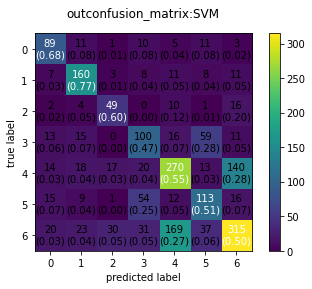

In [35]:

params = {
    'C':[0.01,0.1,10,15,100],
    'kernel':[ 'rbf','poly']
}

clf = svm.SVC()
gs_clf = GridSearchCV(clf, params, n_jobs=-1, scoring='f1_macro')
gs_clf.fit(X_train, y_train)
prediction = gs_clf.predict(X_test)
plt_confusion_matrix(prediction,y_test,'SVM')
print(classification_report(prediction, y_test))

In [36]:
gs_clf.best_params_

{'C': 15, 'kernel': 'rbf'}

## DT

              precision    recall  f1-score   support

           0       0.28      0.32      0.30       140
           1       0.38      0.42      0.40       212
           2       0.29      0.33      0.31        87
           3       0.30      0.27      0.28       248
           4       0.38      0.37      0.38       507
           5       0.23      0.24      0.24       229
           6       0.38      0.36      0.37       548

    accuracy                           0.34      1971
   macro avg       0.32      0.33      0.32      1971
weighted avg       0.34      0.34      0.34      1971



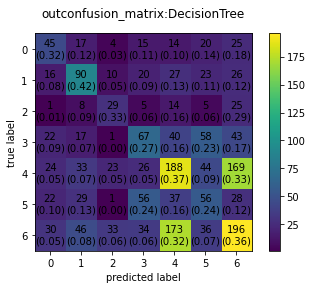

In [37]:
from sklearn.tree import DecisionTreeClassifier
params = {
    'min_samples_split':[2,4,8,16,32],
    'criterion':[ 'entropy','gini']
}

clf = DecisionTreeClassifier()
gs_clf = GridSearchCV(clf, params, n_jobs=-1, scoring='f1_macro')
gs_clf.fit(X_train, y_train)
prediction = gs_clf.predict(X_test)
plt_confusion_matrix(prediction,y_test,'DecisionTree')
print(classification_report(prediction, y_test))

In [38]:
gs_clf.best_params_

{'criterion': 'entropy', 'min_samples_split': 32}

## RandomForestClassifier

              precision    recall  f1-score   support

           0       0.34      0.79      0.48        70
           1       0.62      0.64      0.63       233
           2       0.19      0.79      0.30        24
           3       0.31      0.40      0.35       173
           4       0.44      0.50      0.47       437
           5       0.24      0.45      0.31       128
           6       0.70      0.40      0.51       906

    accuracy                           0.47      1971
   macro avg       0.41      0.57      0.43      1971
weighted avg       0.55      0.47      0.48      1971



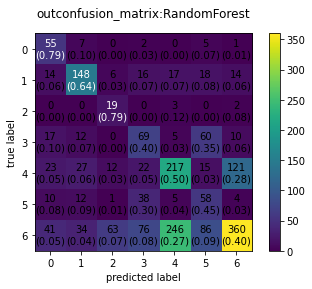

In [39]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'n_estimators':[20,40,80,160,200,300],
    'criterion':[ 'entropy','gini']
}

clf = RandomForestClassifier()
gs_clf = GridSearchCV(clf, params, n_jobs=-1, scoring='f1_macro')
gs_clf.fit(X_train, y_train)
prediction = gs_clf.predict(X_test)
plt_confusion_matrix(prediction,y_test,'RandomForest')
print(classification_report(prediction, y_test))

In [ ]:
gs_clf.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

# **10 Deep Learning model**

In [ ]:
import pickle
filename = '/content/drive/MyDrive/data_all_final.pkl'
pickle.dump(data_all, open(filename, 'wb'))


filename = '/content/drive/MyDrive/data_all_final.pkl'
with open(filename, 'rb') as f:
  data_all_final=pickle.load(f)




In [ ]:
import pandas as pd
data_all=pd.concat((data_development,data_evaluation),axis=0)
data_all.reset_index(inplace=True,drop=True)

## lbl categorical

In [ ]:
y=data_development[['lbl']].to_numpy().reshape(-1,1)
y_1d=np.array([item[0] for item  in y])

In [ ]:
import tensorflow as tf
# convert categorical lbl
lbl_bin= tf.keras.utils.to_categorical(y_1d, 7)
lbl_bin

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## get all signal 

In [ ]:
length_select=45000
data_all['signal_all'] = data_all['signal'].apply(lambda y:y[0:length_select])
data_all['signal_all'] = data_all['signal_all'].apply(lambda y:np.concatenate((y, [0]* (length_select -len(y)))))
data_all['signal_all']

0        [-0.0010869442485272884, 6.950151873752475e-05...
1        [0.0005718687898479402, 0.0005805123946629465,...
2        [3.145638038404286e-05, 3.0807153962086886e-05...
3        [0.007607151288539171, 0.008677023462951183, 0...
4        [4.554699899017578e-06, 2.486741686880123e-05,...
                               ...                        
11304    [0.0001352045510429889, 0.0003834316448774189,...
11305    [-0.03419743478298187, -0.019847800955176353, ...
11306    [-0.003677251748740673, 0.001077924738638103, ...
11307    [-0.0018606807570904493, -0.00221921200864017,...
11308    [-5.5695392802590504e-05, -8.930284093366936e-...
Name: signal_all, Length: 11309, dtype: object

In [ ]:
data_matrix=np.stack(data_all['signal_all'].to_numpy())
data_matrix.shape

(11309, 45000)

## Normalization

In [ ]:
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
scaler = StandardScaler()#MinMaxScaler(feature_range=(-1,1)) # MinMaxScaler()
data_matrix=scaler.fit_transform(data_matrix)


## train and test

In [ ]:
from sklearn.model_selection import train_test_split
X=data_matrix[0:data_development.shape[0]]
y=lbl_bin
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=10)

print("_"*30)
print('X_train  shape: {} '.format(X_train.shape))
print('X_test   shape: {} '.format(X_test.shape))
print("_"*30)

______________________________
X_train  shape: (7883, 45000) 
X_test   shape: (1971, 45000) 
______________________________


## Class weight

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(y_1d),
                                                 y=y_1d)
class_weights

array([1.77966408, 1.26479271, 2.55020704, 1.1839481 , 0.58998922,
       1.16436252, 0.5385288 ])

In [ ]:
dict_weight=dict()
for idx,item in enumerate(class_weights):
  dict_weight[idx]=item
dict_weight

{0: 1.7796640780205888,
 1: 1.264792709536645,
 2: 2.550207039337474,
 3: 1.183948095638592,
 4: 0.5899892228475632,
 5: 1.1643625192012288,
 6: 0.5385288009618537}

## CNN

In [ ]:
input_size=X_train.shape[1],1
lr_value=1e-4
batch_size_value=512
epochs_value=200

In [ ]:
from tensorflow import keras
def create_cnn_model():
  input_layer=keras.layers.Input(shape=input_size,name="input_layer")
 
  # ---------Block 1-------
  x = keras.layers.Conv1D(64, (500),strides=200,
                        activation='relu',
                        padding='same',
                        name='conv1.1')(input_layer)
  x=    keras.layers.BatchNormalization(name='BNormal1.1')(x)
  x =   keras.layers.LeakyReLU(alpha=0.3,name='LReLU1.1')(x)  
  x =   keras.layers.Dropout(0.3,name='Drop1.1')(x)                     
  x = keras.layers.Conv1D(8, (20),strides=1,
                    activation='relu',
                    padding='same',
                    name='conv1.2')(x)
  x=    keras.layers.BatchNormalization(name='BNormal1.2')(x)
  x =   keras.layers.LeakyReLU(alpha=0.3,name='LReLU1.2')(x) 
  x =   keras.layers.Dropout(0.3,name='Drop1.2')(x)
  x = keras.layers.AveragePooling1D((2), name='Avgpool1.1')(x)
  # ---------Block 2-------
  x = keras.layers.Conv1D(32, (2),
                    activation='relu',
                    padding='same',
                    name='conv2.1')(x)
  x=    keras.layers.BatchNormalization(name='BNormal2.1')(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.2)(x)
  x = keras.layers.Conv1D(32, (2),
                    activation='relu',
                    padding='same',
                    name='conv2.2')(x)
  x = keras.layers.AveragePooling1D((2), name='Avgpool2.1')(x)


  # finall layer
  x = keras.layers.Flatten(name='flt')(x)
  x = keras.layers.Dense(512,activation='relu',name='FC1')(x)
  x = keras.layers.Dense(500,activation='relu',name='FC2')(x) 
  x =   keras.layers.LeakyReLU(alpha=0.3,name='LReLUFC')(x)
  x = keras.layers.Dropout(0.1,name='DropFC')(x)

  #____________________________________________________________
  output  = keras.layers.Dense(7,activation='Softmax')(x)

  CNN_model = keras.Model(inputs=input_layer, outputs=output)
  opti = keras.optimizers.Adam(learning_rate=0.0001,epsilon=1e-7,beta_1=0.9,beta_2=0.999)
  los=keras.losses.CategoricalCrossentropy()
  CNN_model.compile(optimizer=opti,
                loss=los,
                metrics='accuracy')
  return CNN_model


In [ ]:
CNN_model=create_cnn_model()
CNN_model.summary(show_trainable=True)

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_layer (InputLayer)    [(None, 45000, 1)]        0         Y          
                                                                            
 conv1.1 (Conv1D)            (None, 225, 64)           32064     Y          
                                                                            
 BNormal1.1 (BatchNormalizat  (None, 225, 64)          256       Y          
 ion)                                                                       
                                                                            
 LReLU1.1 (LeakyReLU)        (None, 225, 64)           0         Y          
                                                                            
 Drop1.1 (Dropout)           (None, 225, 64)           0         Y          
                                                             

In [ ]:
hsit=CNN_model.fit(X_train,y_train,
                       shuffle=True,
                       batch_size=512,
                       epochs=100,class_weight=dict_weight,
                       validation_data=(X_test,y_test))

Epoch 1/100
16/16 [==============================] - 13s 227ms/step - loss: 1.9494 - accuracy: 0.1780 - val_loss: 1.9408 - val_accuracy: 0.1761
Epoch 2/100
16/16 [==============================] - 1s 83ms/step - loss: 1.8907 - accuracy: 0.1964 - val_loss: 1.9416 - val_accuracy: 0.1436
Epoch 3/100
16/16 [==============================] - 1s 81ms/step - loss: 1.8514 - accuracy: 0.2143 - val_loss: 1.9444 - val_accuracy: 0.1309
Epoch 4/100
16/16 [==============================] - 1s 81ms/step - loss: 1.8267 - accuracy: 0.2379 - val_loss: 1.9493 - val_accuracy: 0.1182
Epoch 5/100
16/16 [==============================] - 1s 83ms/step - loss: 1.7928 - accuracy: 0.2354 - val_loss: 1.9501 - val_accuracy: 0.1167
Epoch 6/100
16/16 [==============================] - 1s 80ms/step - loss: 1.7574 - accuracy: 0.2617 - val_loss: 1.9557 - val_accuracy: 0.1157
Epoch 7/100
16/16 [==============================] - 1s 81ms/step - loss: 1.7234 - accuracy: 0.2741 - val_loss: 1.9610 - val_accuracy: 0.1142
Epoc

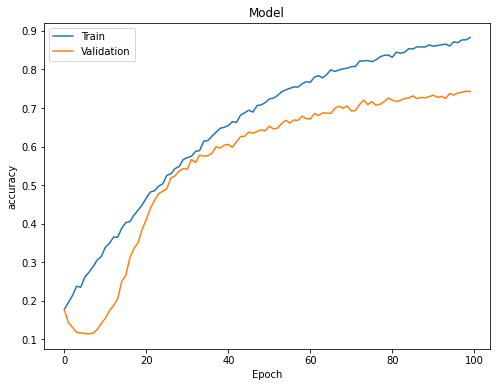

In [ ]:


# summarize history for error
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))

loss_train=hsit.history['accuracy']
loss_vali=hsit.history['val_accuracy']
plt.plot(loss_train,label="Train")
plt.plot(loss_vali,label="Validation")

plt.title('Model')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix


def plt_confusion_matrix(lbl_real,lbl_pred,algorithm_name):
  lbl_pred=np.argmax(lbl_pred,axis=1)
  lbl_real=np.argmax(lbl_real,axis=1)
  Con_matrix=confusion_matrix(lbl_real,lbl_pred)
  fig, ax = plot_confusion_matrix(conf_mat=Con_matrix,
                                  show_absolute=True,
                                  show_normed=True,
                                  colorbar=True,cmap="viridis")
      
  ax.set_title('outconfusion_matrix:'+ algorithm_name)
  # fig.savefig(path_name)

62/62 [==============================] - 1s 6ms/step


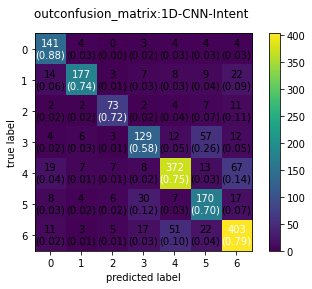

In [ ]:
lbl_pred=CNN_model.predict(X_test)
plt_confusion_matrix(y_test,lbl_pred,"1D-CNN-Intent ")

In [ ]:
prediction = CNN_model.predict(X_test)
prediction=np.argmax(prediction,axis=1)
y_t=np.argmax(y_test,axis=1)
print(classification_report(prediction, y_t))

62/62 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       199
           1       0.74      0.87      0.80       203
           2       0.72      0.75      0.74        97
           3       0.58      0.66      0.62       196
           4       0.75      0.81      0.78       458
           5       0.70      0.60      0.65       282
           6       0.79      0.75      0.77       536

    accuracy                           0.74      1971
   macro avg       0.74      0.74      0.73      1971
weighted avg       0.75      0.74      0.74      1971



In [ ]:
CNN_model.fit(X,lbl_bin,
                       shuffle=True,
                       batch_size=512,
                       epochs=100,class_weight=dict_weight,
                       validation_data=(X_test,y_test))

In [ ]:
prediction = CNN_model.predict(X)
prediction=np.argmax(prediction,axis=1)
y_t=np.argmax(lbl_bin,axis=1)
print(classification_report(prediction, y_t))

In [ ]:
data_sub=data_matrix[data_development.shape[0]:]

In [ ]:
prediction = CNN_model.predict(data_sub)
prediction=np.argmax(prediction,axis=1)

In [ ]:
import pandas as pd
Submission=pd.DataFrame()
# Submission['Id']=data_main_eva_pre['Id']
Submission['Predicted']=le_dict['lbl'].inverse_transform(prediction)
Submission

In [ ]:
Submission.to_csv('subm8.csv',index_label='Id')